In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import json
pd.set_option('display.max_rows', 1000)
%matplotlib inline

In [2]:
# Read config
with open('config.json') as json_file:
    f = json.load(json_file)
    NUMBER_OF_QUERIES = f['number_of_queries']
    REPETITIONS = f['repetitions']
    ROWS = f['rows']
    SELECTIVITIES = [f['selectivity']]
    COLS = f['cols']
    EXPS_DEFAULTS = f['experiments']
    PARTITION_SIZE = f['partition_size']
    PROGRESSIVE_INDEX_DELTAS = f['deltas']

# Algorithms and Experiments defitions
algorithms = {
    'AverageKDTree': {
        'name': 'average_kd_tree',
        'color': 'red',
        'dash': 'dot',
        'show_name': 'AvgKD',
        'type': 'full_index',
        'delta': '0.0',
        'partition_size': PARTITION_SIZE
    },
    'MedianKDTree': {
        'name': 'median_kd_tree',
        'color': 'red',
        'dash': 'solid',
        'show_name': 'MedKD',
        'type': 'full_index',
        'delta': '0.0',
        'partition_size': PARTITION_SIZE
    },
    'CrackingKDTree': {
        'name': 'cracking_kd_tree',
        'color': 'green',
        'dash': 'dot',
        'show_name': 'AKD',
        'type': 'adaptive',
        'delta': '0.0',
        'partition_size': PARTITION_SIZE
    },
    'Quasii': {
        'name': 'quasii',
        'color': 'green',
        'dash': 'solid',
        'show_name': 'Q',
        'type': 'adaptive',
        'delta': '0.0',
        'partition_size': PARTITION_SIZE
    },
    'FullScan': {
        'name': 'full_scan_cl',
        'color': 'black',
        'dash': 'dot',
        'show_name': 'FS',
        'type': 'full_index',
        'partition_size': '0',
        'delta':'0.0',
    },
    'ProgressiveIndexCostModel': {
        'name': 'progressive_index_cm',
        'color': 'purple',
        'dash': 'dot',
        'show_name': 'GPKD(.2)',
        'type': 'adaptive',
        'delta': PROGRESSIVE_INDEX_DELTAS[0],
        'partition_size': PARTITION_SIZE
    },
    'ProgressiveIndex': {
        'name': 'progressive_index',
        'color': 'purple',
        'dash': 'solid',
        'show_name': 'PKD(.2)',
        'type': 'adaptive',
        'delta': PROGRESSIVE_INDEX_DELTAS[0],
        'partition_size': PARTITION_SIZE
    }
}

for key, value in algorithms.items():
    name = value['name']
    delta = value['delta']
    partition_size = value['partition_size']
    algorithms[key]['alg_id'] = f"{name}-{delta}-{partition_size}"

# deltas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# for i in deltas:
#     # For the delta experiment
#     temp = {
#         f'ProgressiveIndexCostModel_{i}': {
#             'name': 'progressive_index_cm',
#             'color': '',
#             'dash': 'solid',
#             'marker': 'x',
#             'show_name': f'GPKD({i})',
#             'type': 'adaptive',
#             'delta': f'{i}',
#             'partition_size': '1024'
#         },
#         f'ProgressiveIndex_{i}': {
#             'name': 'progressive_index',
#             'color': '',
#             'dash': 'solid',
#             'marker': 'x-open',
#             'show_name': f'PKD({i})',
#             'type': 'adaptive',
#             'delta': f'{i}',
#             'partition_size': '1024'
#         }
#     }
#     algorithms = {**algorithms, **temp}


    
# Synthetic Experiments
experiments = {}

for i in [2]:
    temp = {
        f'Uniform{i}': {
            "name": f"Unif({i})",
            'name-in-file': 'uniform',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        },
        f'Skewed{i}': {
            "name": f"Skewed({i})",
            'name-in-file': 'skewed',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        },
        f'Sequential{i}': {
            "name": f"Seq ({i})",
            'name-in-file': 'sequential',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        },
        f'Periodic{i}': {
            "name": f"Prdc({i})",
            'name-in-file': 'periodic',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        },
        f'ZoomIn{i}': {
            "name": f"Zoom({i})",
            'name-in-file': 'zoom_in',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        },
        f'SequentialZoomIn{i}': {
            "name": f"SeqZoom({i})",
            'name-in-file': 'sequential_zoom_in',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        },
        f'AlternatingZoomIn{i}': {
            "name": f"AltZoom({i})",
            'name-in-file': 'alternating_zoom_in',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        },
        f'Shifting{i}': {
            "name": f"Shift({i})",
            'name-in-file': '',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        }
    }
    experiments = {**experiments, **temp}
    
for key, value in experiments.items():
    name = value['name-in-file']
    rows = value['n_rows']
    n_queries = value['n_queries']
    cols = value['n_cols']
    sel = value['sel']
    experiments[key]['exp_id'] = f"{name}-{rows}-{n_queries}-{cols}-{sel}"

In [3]:
# Input/Output
def read(alg, exp):
    if exp.startswith('Shifting'):
        n_queries_per_run = 10
        uni = read(alg, 'Uniform' + experiments[exp]['n_cols'])
        n_runs = int(len(uni)/n_queries_per_run) - 1
        df_final = uni.head(n_queries_per_run)
        for _ in range(int(n_runs)):
            temp = uni.head(n_queries_per_run).copy()
            df_final = df_final.append(temp, ignore_index=True)
    else:
        df = pd.read_csv(f"results/{algorithms[alg]['alg_id']}-{experiments[exp]['exp_id']}.csv")
        repetitions = df['repetition'].max() + 1
        step = int(len(df.index)/repetitions)
        df_final = df[:step].copy().reset_index()
        for rep in range(1, repetitions):
            df_final += df[step * (rep) : step * (rep + 1)].copy().reset_index()

        df_final = df_final/repetitions
    
    if 'index_search_time' not in df_final:
        df_final['index_search_time'] = 0.0
    if 'tuples_scanned' not in df_final:
        df_final['tuples_scanned'] = 0.0
    if 'number_of_nodes' not in df_final:
        df_final['number_of_nodes'] = 0.0
    df_final['query_time'] = df_final['initialization_time'] + df_final['index_search_time'] + df_final['scan_time'] + df_final['adaptation_time']
    df_final['query_time_cumsum'] = df_final['query_time'].cumsum()
    return df_final

                     
def read_multiple(algs, exp):
    ''' Reads multiple algorithms in an experiment, return three arrays: dfs, colors, names
    '''
    dfs = []
    colors = []
    names = []
    dashes = []
    for alg in algs:
        dfs.append(read(alg, exp))
        names.append(algorithms[alg]['show_name'])
        colors.append(algorithms[alg]['color'])
        dashes.append(algorithms[alg]['dash'])
    
    return dfs, colors, dashes, names,

                     
def save_figure(fig, fig_name):
    fig.write_image(f"figures/{fig_name}", width=1024, height=768)
                     
def save_table(table, table_name):
    with open(f"tables/{table_name}", 'w') as f:
        f.write(table)

In [4]:
# Helper methods
def get_first_query(df):
    return df['query_time'].iloc[0]

def get_payoff(df, baseline):
    p = [i for i, x in enumerate(df['query_time_cumsum'] - (baseline['query_time_cumsum'])) if x > 0]
    if len(p) == 0:
        return len(df)
    return p[-1]

def get_convergence(df, df_type=''):
    if df_type == 'full_index':
        return 0
    c = [i for i, x in enumerate(df['adaptation_time']) if x != 0.0]
    if(len(c) == 0):
        return len(c)
    else:
        return c[-1]

def get_robustness(df, df_type=''):
    if df_type == 'full_index':
        return 0
    return np.var(df['query_time'][:min(50, get_convergence(df, df_type))])

def get_total_time(df, lower=0, upper=-1):
    return df['query_time'][lower:upper].sum()

In [5]:
# Figures

delta_cols = [2, 4, 5, 6, 7, 8]
delta_markers = ['circle', 'square', 'x', 'star', 'triangle-up', 'diamond']

def create_figure(data=[]):
    fig = go.Figure(
        data=data,
        layout=go.Layout(
#             width=1500,
            plot_bgcolor='rgba(0,0,0,0)',
            font=dict(
                size=42
            ),
            yaxis=dict(
                showline=True,
                linewidth=2,
                linecolor='black',
                showgrid=True,
                gridwidth=1,
                gridcolor='lightgrey',
                zeroline=False,
                zerolinecolor='rgba(0, 0, 0, 0)',
                ticks="inside",
                ticklen=5
            ),
            xaxis=dict(
                showline=True,
                linewidth=2,
                linecolor='black',
                ticks='inside',
                zeroline=True,
                ticklen=5
            ),
            legend=dict(
                font=dict(
                    size=30,
                    color="black"
                )
            )
        )
    )
    return fig

def line(exp, algs, attr, limit=2000):
    dfs, colors, dashes, names = read_multiple(algs, exp)
    fig = create_figure()
    
    lines = []
    
    biggest = 0
    
    for i, df in enumerate(dfs):
        per_query_times = np.array(df[attr][:limit])
        if biggest < np.max(per_query_times):
            biggest = np.max(per_query_times)
        lines.append(
            go.Scatter(
                name=names[i],
                x=list(range(len(per_query_times))),
                y=per_query_times,
#                 marker_color=colors[i],
                mode='lines',
                line=dict(width=4, dash=dashes[i])
            )
        )
    
    fig.add_traces(data=lines)
    fig.update_layout(showlegend=True, yaxis_title=attr)
    return fig

def workload_selectivity(exp):
    fig = create_figure()
    df = read('FullScan', exp)
    sel = ((df['tuples_scanned']/df['scan_overhead'])/df['tuples_scanned']) * 100
    
    fig.add_traces(
        data=go.Scatter(
            name='selectivity',
            x=list(range(len(sel))),
            y=sel,
            mode='lines',
            line=dict(width=4)
        )
    )
    fig.update_layout(showlegend=True, yaxis_title='Selectivity (%)')
    return fig


def per_query(exp, algs, limit=1000):
    dfs, colors, dashes, names = read_multiple(algs, exp)
    fig = create_figure()
    
    lines = []
    
    biggest = 0
    
    for i, df in enumerate(dfs):
        alg = algs[i]
        per_query_times = np.array(df['query_time'][:limit]) * 1000
        if biggest < np.max(per_query_times):
            biggest = np.max(per_query_times)
        lines.append(
            go.Scatter(
                name=names[i],
                x=list(range(len(per_query_times))),
                y=per_query_times,
                marker_color=colors[i],
                mode='lines',
                line=dict(width=6, dash=dashes[i])
            )
        )
        
    fig.add_traces(data=lines)
    fig.update_layout(showlegend=True, yaxis_title='Time (milliseconds)')
    fig.update_layout(legend_orientation="h", legend=dict(x=.25, y=1.2))
    fig.update_yaxes(type="log")
    return fig

def cummulative(exp, algs, limit=5000):
    dfs, colors, dashes, names = read_multiple(algs, exp)
    fig = create_figure()
    
    lines = []
    
    biggest = 0
    
    for i, df in enumerate(dfs):
        alg = algs[i]
        per_query_times = np.array(df['query_time_cumsum'][:limit])
        lines.append(
            go.Scatter(
                name=names[i],
                x=list(range(len(per_query_times))),
                y=per_query_times,
                marker_color=colors[i],
                mode='lines',
                line=dict(width=6, dash=dashes[i])
            )
        )
    
    fig.add_traces(data=lines)
    fig.update_layout(legend_orientation="h", legend=dict(x=.25, y=1.2))
    fig.update_layout(showlegend=True, yaxis_title='Time (Seconds)')
    return fig

def number_of_nodes(exp, algs, limit=5000):
    dfs, colors, dashes, names = read_multiple(algs, exp)
    fig = create_figure()
    
    lines = []
    
    biggest = 0
    
    for i, df in enumerate(dfs):
        per_query_times = np.array(df['number_of_nodes'][:limit])
        if biggest < np.max(per_query_times):
            biggest = np.max(per_query_times)
        lines.append(
            go.Scatter(
                name=names[i],
                x=list(range(len(per_query_times))),
                y=per_query_times,
                marker_color=colors[i],
                mode='lines',
                line=dict(width=6, dash=dashes[i])
            )
        )
    
    fig.add_traces(data=lines)
    fig.update_layout(legend_orientation="h", legend=dict(x=.25, y=1.2))
    fig.update_layout(showlegend=True, yaxis_title='# Nodes')
    return fig

def tuples_scanned(exp, algs, limit=5000):
    dfs, colors, dashes, names = read_multiple(algs, exp)
    fig = create_figure()
    
    lines = []
    
    
    for i, df in enumerate(dfs):
        per_query_times = np.array(df['tuples_scanned'][:limit])
        lines.append(
            go.Scatter(
                name=names[i],
                x=list(range(len(per_query_times))),
                y=per_query_times,
                marker_color=colors[i],
                mode='lines',
                line=dict(width=6, dash=dashes[i])
            )
        )
    
    fig.add_traces(data=lines)
    fig.update_layout(legend_orientation="h", legend=dict(x=.25, y=1.2))
    fig.update_layout(showlegend=True, yaxis_title='Tuples Scanned')
    return fig

def break_down(exp, algs, limit):
    dfs, _, _, names = read_multiple(algs, exp)
    initializations = np.array([x['initialization_time'][:limit].sum() for x in dfs])
    adaptation = np.array([x['adaptation_time'][:limit].sum() for x in dfs])
    search = np.array([x['index_search_time'][:limit].sum() for x in dfs])
    scan = np.array([x['scan_time'][:limit].sum() for x in dfs])
    
#     fig = create_figure(data=[
#         go.Bar(name='Initialization', x=names, y=initializations, marker_color='rgb(176, 201, 146)'),
#         go.Bar(name='Adaptation', x=names, y=adaptation, marker_color='rgb(195, 114, 28)'),
#         go.Bar(name='Index Search', x=names, y=search, marker_color='rgb(197, 255, 114)'),
#         go.Bar(name='Scan', x=names, y=scan, marker_color='rgb(237, 218, 123)'),
#     ])

    scan_color = '#AB63FA'
    index_search_color = '#03CC96'
    adaptation_color = '#EF553B'
    initialization_color = '#636EFA'

    data = [
        go.Bar(name='Initialization', x=names, y=initializations, width=0.5, marker_color=initialization_color, showlegend=False),
        go.Bar(name='Adaptation', x=names, y=adaptation, width=0.5, marker_color=adaptation_color, showlegend=False),
        go.Bar(name='Index Search', x=names, y=search, width=0.5, marker_color=index_search_color,showlegend=False),
        go.Bar(name='Scan', x=names, y=scan, width=0.5, marker_color=scan_color,showlegend=False),
    ]
    
    data.append(
        go.Scatter(
            name='Initialization',
            x=[None],
            y=[None],
            mode='markers',
            marker_color=initialization_color,
            marker=dict(
                size=40,
                symbol='square'
            ),
        )
    )
    
    data.append(
        go.Scatter(
            name='Adaptation',
            x=[None],
            y=[None],
            mode='markers',
            marker_color=adaptation_color,
            marker=dict(
                size=40,
                symbol='square'
            ),
        )
    )
    
    data.append(
        go.Scatter(
            name='Index Search',
            x=[None],
            y=[None],
            mode='markers',
            marker_color=index_search_color,
            marker=dict(
                size=40,
                symbol='square'
            ),
        )
    )
    
    data.append(
        go.Scatter(
            name='Scan',
            x=[None],
            y=[None],
            mode='markers',
            marker_color=scan_color,
            marker=dict(
                size=40,
                symbol='square'
            ),
        )
    )

    fig = create_figure(data=data)
    
    # Change the bar mode
    fig.update_layout(barmode='stack')
    fig.update_layout(legend_orientation="h", legend=dict(x=.25, y=1.2))
    fig.update_layout(yaxis_title='Time (seconds)')
    return fig

In [6]:
# Latex Tables

def pandas_to_latex(df, highlight='min', ignore_last=False, float_format="%.2f"):
    mins = []
    maxs = []
    for i in range(len(df)):
        row = df.iloc[i]
        c_min = float('inf')
        c_max = -float('inf')
        if ignore_last:
            length = len(row) - 1
        else:
            length = len(row)
        for j in range(length):
            if row[j] == '-' or row[j] == '*':
                continue
            if c_min > float(row[j]):
                c_min = float(row[j])
            if c_max < float(row[j]):
                c_max = float(row[j])
        mins.append(c_min)
        maxs.append(c_max)
    
    for i in range(len(df)):
        row = df.iloc[i]
        for j in range(len(row)):
            if row[j] == '-' or row[j] == '*':
                continue
            if highlight == 'min':
                if float(row[j]) == mins[i]:
                    row[j] = "\cellcolor{green!25}" + (float_format % float(row[j]))
                else:
                    row[j] = float_format % float(row[j])
            if highlight == 'max':
                if float(row[j]) == maxs[i]:
                    row[j] = "\cellcolor{green!25}" + (float_format % float(row[j]))
                else:
                    row[j] = float_format % float(row[j])
    
    return df.to_latex(multicolumn=True, multirow=True, escape=False)

def metrics(exps, algs):
    '''
    ||||||||||||Algorithm 1| Algorithm 2|...
    First Query|   1.11.   |     15.    |...
    ...
    '''
    data = {}

    # create indexes
    index_exp = []
    index_metric = []
    
    
    metrics = ['First Query', 'PayOff', 'Convergence', 'Robustness', 'Time']

    
    for exp in exps:
        dfs, _, _, names = read_multiple(algs, exp)
        
        # initialize the data dict with empty arrays for each algorithm
        for name in names:
            if name not in data:
                data[name] = []

        baseline = read('FullScan', exp)

        index_exp += [experiments[exp]['name']] * len(metrics)
        index_metric += metrics
        
        for df, name, alg in zip(dfs, names, algs):
            data[name].append('%.2f' % get_first_query(df))
            po = get_payoff(df, baseline)
            if po == len(df):
                data[name].append('-')
            else:
                data[name].append(po)
            conv = get_convergence(df, algorithms[alg]['type'])
            if conv == 0:
                data[name].append('-')
            elif conv >= len(df)-1:
                data[name].append('*')
            else:
                data[name].append(conv)
            
            robust = get_robustness(df, algorithms[alg]['type'])
            if robust == 0:
                data[name].append('-') 
            else:
                data[name].append('%.E' % robust)
            
            
            data[name].append('%.2f' %get_total_time(df))

    index = [index_exp, index_metric]
    df = pd.DataFrame(data, index=index)

    return df
    
    latex = df.to_latex(multicolumn=True, multirow=True)

    for exp in exps:
        latex = latex.replace(exp, "\\rotatebox[origin=c]{90}{%s}" % exp)
    return latex

In [7]:
exps = ['Uniform8', 'Skewed8', 'ZoomIn8', 'Periodic8', 'SequentialZoomIn8', 'AlternatingZoomIn8', 'Shifting8', 'Sequential2',]
exps = ['Uniform2', 'Skewed2', 'ZoomIn2', 'Periodic2', 'SequentialZoomIn2', 'AlternatingZoomIn2', 'Shifting2', 'Sequential2',]
m = metrics(exps, [
        'MedianKDTree',
        'AverageKDTree',
        'Quasii',
        'CrackingKDTree',
        'ProgressiveIndex',
        'ProgressiveIndexCostModel',
        'FullScan',
])
m

MedKD AvgKD      Q    AKD PKD(.2) GPKD(.2)    FS
Unif(2)    First Query  0.15  0.07   0.03   0.01    0.00     0.02  0.00
           PayOff         44    19     14      6      21       30     -
           Convergence     -     -      *      *      35        5     -
           Robustness      -     -  2E-05  4E-06   2E-06    7E-07     -
           Time         0.16  0.08   0.07   0.05    0.12     0.12  0.34
Skewed(2)  First Query  0.16  0.07   0.03   0.01    0.01     0.00  0.00
           PayOff         40    20      9      5      27       28     -
           Convergence     -     -      *      *      35       26     -
           Robustness      -     -  3E-05  4E-06   3E-06    6E-09     -
           Time         0.17  0.08   0.07   0.03    0.12     0.11  0.39
Zoom(2)    First Query  0.22  0.08   0.03   0.03    0.00     0.00  0.01
           PayOff         65    18      1      1      50       29     -
           Convergence     -     -     98      *      35       29     -
           Robustness      -     -  2E-05  1E-05   1E-05    8E-09     -
           Time         0.23  0.09   0.03   0.04    0.18     0.12  0.43
Prdc(2)    First Query  0.16  0.07   0.04   0.01    0.00     0.00  0.00
           PayOff         52    21     18     15      12       39     -
           Convergence     -     -      *      *      35       24     -
           Robustness      -     -  3E-05  3E-06   7E-07    1E-05     -
           Time         0.17  0.08   0.07   0.09    0.09     0.13  0.32
SeqZoom(2) First Query  0.15  0.07   0.04   0.01    0.00     0.00  0.00
           PayOff         30    18     10      2       8       20     -
           Convergence     -     -     96      *      35       20     -
           Robustness      -     -  3E-05  3E-06   5E-07    2E-08     -
           Time         0.16  0.08   0.06   0.03    0.08     0.09  0.38
AltZoom(2) First Query  0.15  0.08   0.04   0.01    0.00     0.00  0.00
           PayOff         48    23     11      2      22       24     -
           Convergence     -     -      *      *      35       19     -
           Robustness      -     -  3E-05  2E-06   1E-06    1E-08     -
           Time         0.16  0.08   0.04   0.02    0.10     0.08  0.32
Shift(2)   First Query  0.15  0.07   0.03   0.01    0.00     0.02  0.00
           PayOff         99    99     99     21      99       99     -
           Convergence     -     -      *      *       *       95     -
           Robustness      -     -  9E-05  1E-05   1E-06    9E-05     -
           Time         1.55  0.70   0.48   0.30    0.43     1.07  0.34
Seq (2)    First Query  0.15  0.07   0.04   0.01    0.00     0.01  0.00
           PayOff          8     8      8      8       8        8     -
           Convergence     -     -      *      *       *        *     -
           Robustness      -     -  1E-04  1E-05   2E-07    3E-08     -
           Time         0.16  0.07   0.05   0.03    0.03     0.05  0.03

# First Query Analysis

In [8]:
idx = pd.IndexSlice
a = m.loc[idx[:, 'First Query'], :]
a = a.reset_index(level=1, drop=True)
print(pandas_to_latex(a, 'min', ignore_last=True))
a

\begin{tabular}{llllllll}
\toprule
{} & MedKD & AvgKD &     Q &   AKD &                   PKD(.2) &                  GPKD(.2) &                        FS \\
\midrule
Unif(2)    &  0.15 &  0.07 &  0.03 &  0.01 &  \cellcolor{green!25}0.00 &                      0.02 &  \cellcolor{green!25}0.00 \\
Skewed(2)  &  0.16 &  0.07 &  0.03 &  0.01 &                      0.01 &  \cellcolor{green!25}0.00 &  \cellcolor{green!25}0.00 \\
Zoom(2)    &  0.22 &  0.08 &  0.03 &  0.03 &  \cellcolor{green!25}0.00 &  \cellcolor{green!25}0.00 &                      0.01 \\
Prdc(2)    &  0.16 &  0.07 &  0.04 &  0.01 &  \cellcolor{green!25}0.00 &  \cellcolor{green!25}0.00 &  \cellcolor{green!25}0.00 \\
SeqZoom(2) &  0.15 &  0.07 &  0.04 &  0.01 &  \cellcolor{green!25}0.00 &  \cellcolor{green!25}0.00 &  \cellcolor{green!25}0.00 \\
AltZoom(2) &  0.15 &  0.08 &  0.04 &  0.01 &  \cellcolor{green!25}0.00 &  \cellcolor{green!25}0.00 &  \cellcolor{green!25}0.00 \\
Shift(2)   &  0.15 &  0.07 &  0.03 &  0.01 &  \cellcol

MedKD AvgKD     Q   AKD                   PKD(.2)  \
Unif(2)     0.15  0.07  0.03  0.01  \cellcolor{green!25}0.00   
Skewed(2)   0.16  0.07  0.03  0.01                      0.01   
Zoom(2)     0.22  0.08  0.03  0.03  \cellcolor{green!25}0.00   
Prdc(2)     0.16  0.07  0.04  0.01  \cellcolor{green!25}0.00   
SeqZoom(2)  0.15  0.07  0.04  0.01  \cellcolor{green!25}0.00   
AltZoom(2)  0.15  0.08  0.04  0.01  \cellcolor{green!25}0.00   
Shift(2)    0.15  0.07  0.03  0.01  \cellcolor{green!25}0.00   
Seq (2)     0.15  0.07  0.04  0.01  \cellcolor{green!25}0.00   

                            GPKD(.2)                        FS  
Unif(2)                         0.02  \cellcolor{green!25}0.00  
Skewed(2)   \cellcolor{green!25}0.00  \cellcolor{green!25}0.00  
Zoom(2)     \cellcolor{green!25}0.00                      0.01  
Prdc(2)     \cellcolor{green!25}0.00  \cellcolor{green!25}0.00  
SeqZoom(2)  \cellcolor{green!25}0.00  \cellcolor{green!25}0.00  
AltZoom(2)  \cellcolor{green!25}0.00  \cellcolor{green!25}0.00  
Shift(2)                        0.02  \cellcolor{green!25}0.00  
Seq (2)                         0.01  \cellcolor{green!25}0.00

# Payoff Analysis

In [9]:
idx = pd.IndexSlice
a = m[['AvgKD', 'MedKD', 'AKD', 'Q', 'PKD(.2)', 'GPKD(.2)']].loc[idx[:, 'PayOff'], :]
a = a.reset_index(level=1, drop=True)
print(pandas_to_latex(a, 'min', ignore_last=False, float_format="%.0f"))
a

\begin{tabular}{lllllll}
\toprule
{} &                  AvgKD &                  MedKD &                     AKD &                      Q &                 PKD(.2) &               GPKD(.2) \\
\midrule
Unif(2)    &                     19 &                     44 &   \cellcolor{green!25}6 &                     14 &                      21 &                     30 \\
Skewed(2)  &                     20 &                     40 &   \cellcolor{green!25}5 &                      9 &                      27 &                     28 \\
Zoom(2)    &                     18 &                     65 &   \cellcolor{green!25}1 &  \cellcolor{green!25}1 &                      50 &                     29 \\
Prdc(2)    &                     21 &                     52 &                      15 &                     18 &  \cellcolor{green!25}12 &                     39 \\
SeqZoom(2) &                     18 &                     30 &   \cellcolor{green!25}2 &                     10 &                      

AvgKD                  MedKD  \
Unif(2)                        19                     44   
Skewed(2)                      20                     40   
Zoom(2)                        18                     65   
Prdc(2)                        21                     52   
SeqZoom(2)                     18                     30   
AltZoom(2)                     23                     48   
Shift(2)                       99                     99   
Seq (2)     \cellcolor{green!25}8  \cellcolor{green!25}8   

                               AKD                      Q  \
Unif(2)      \cellcolor{green!25}6                     14   
Skewed(2)    \cellcolor{green!25}5                      9   
Zoom(2)      \cellcolor{green!25}1  \cellcolor{green!25}1   
Prdc(2)                         15                     18   
SeqZoom(2)   \cellcolor{green!25}2                     10   
AltZoom(2)   \cellcolor{green!25}2                     11   
Shift(2)    \cellcolor{green!25}21                     99   
Seq (2)      \cellcolor{green!25}8  \cellcolor{green!25}8   

                           PKD(.2)               GPKD(.2)  
Unif(2)                         21                     30  
Skewed(2)                       27                     28  
Zoom(2)                         50                     29  
Prdc(2)     \cellcolor{green!25}12                     39  
SeqZoom(2)                       8                     20  
AltZoom(2)                      22                     24  
Shift(2)                        99                     99  
Seq (2)      \cellcolor{green!25}8  \cellcolor{green!25}8

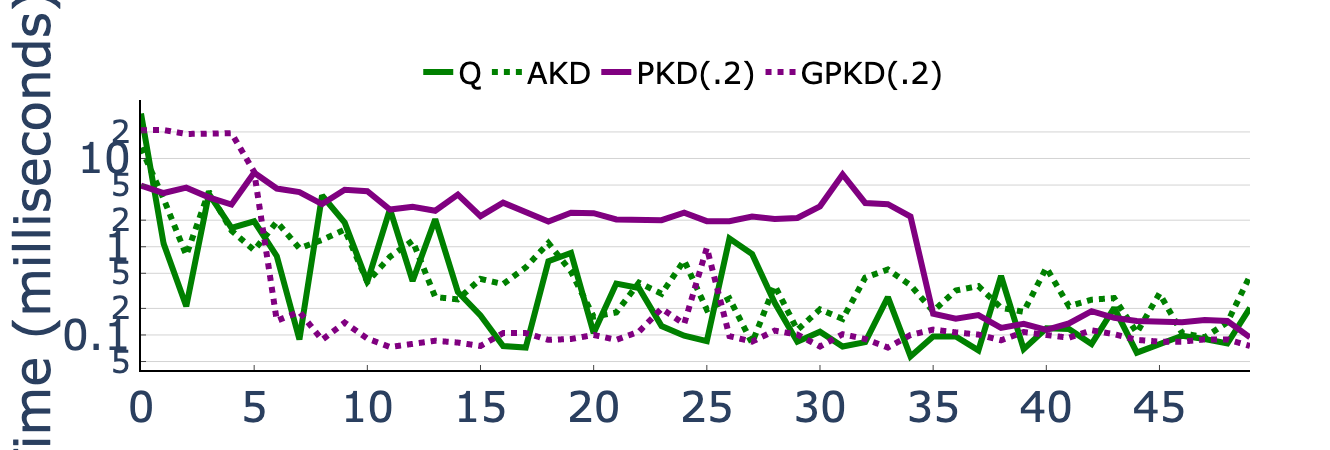

In [10]:
per_query('Uniform2', ['Quasii',
        'CrackingKDTree',
        'ProgressiveIndex',
        'ProgressiveIndexCostModel'], 50)

### Robustness

In [11]:
idx = pd.IndexSlice
a = m[['AKD', 'Q', 'PKD(.2)', 'GPKD(.2)']].loc[idx[:, 'Robustness'], :]
a = a.reset_index(level=1, drop=True)
print(pandas_to_latex(a, 'min', ignore_last=False, float_format='%.E'))
a

\begin{tabular}{lllll}
\toprule
{} &    AKD &      Q &                    PKD(.2) &                   GPKD(.2) \\
\midrule
Unif(2)    &  4E-06 &  2E-05 &                      2E-06 &  \cellcolor{green!25}7E-07 \\
Skewed(2)  &  4E-06 &  3E-05 &                      3E-06 &  \cellcolor{green!25}6E-09 \\
Zoom(2)    &  1E-05 &  2E-05 &                      1E-05 &  \cellcolor{green!25}8E-09 \\
Prdc(2)    &  3E-06 &  3E-05 &  \cellcolor{green!25}7E-07 &                      1E-05 \\
SeqZoom(2) &  3E-06 &  3E-05 &                      5E-07 &  \cellcolor{green!25}2E-08 \\
AltZoom(2) &  2E-06 &  3E-05 &                      1E-06 &  \cellcolor{green!25}1E-08 \\
Shift(2)   &  1E-05 &  9E-05 &  \cellcolor{green!25}1E-06 &                      9E-05 \\
Seq (2)    &  1E-05 &  1E-04 &                      2E-07 &  \cellcolor{green!25}3E-08 \\
\bottomrule
\end{tabular}



AKD      Q                    PKD(.2)                   GPKD(.2)
Unif(2)     4E-06  2E-05                      2E-06  \cellcolor{green!25}7E-07
Skewed(2)   4E-06  3E-05                      3E-06  \cellcolor{green!25}6E-09
Zoom(2)     1E-05  2E-05                      1E-05  \cellcolor{green!25}8E-09
Prdc(2)     3E-06  3E-05  \cellcolor{green!25}7E-07                      1E-05
SeqZoom(2)  3E-06  3E-05                      5E-07  \cellcolor{green!25}2E-08
AltZoom(2)  2E-06  3E-05                      1E-06  \cellcolor{green!25}1E-08
Shift(2)    1E-05  9E-05  \cellcolor{green!25}1E-06                      9E-05
Seq (2)     1E-05  1E-04                      2E-07  \cellcolor{green!25}3E-08

# Response time

In [12]:
idx = pd.IndexSlice
a = m.loc[idx[:, 'Time'], :]
a = a.reset_index(level=1, drop=True)
print(pandas_to_latex(a, 'min', ignore_last=False, float_format="%.1f"))
a

\begin{tabular}{llllllll}
\toprule
{} & MedKD & AvgKD &                        Q &                      AKD &                  PKD(.2) & GPKD(.2) &                       FS \\
\midrule
Unif(2)    &   0.2 &   0.1 &                      0.1 &  \cellcolor{green!25}0.1 &                      0.1 &      0.1 &                      0.3 \\
Skewed(2)  &   0.2 &   0.1 &                      0.1 &  \cellcolor{green!25}0.0 &                      0.1 &      0.1 &                      0.4 \\
Zoom(2)    &   0.2 &   0.1 &  \cellcolor{green!25}0.0 &                      0.0 &                      0.2 &      0.1 &                      0.4 \\
Prdc(2)    &   0.2 &   0.1 &  \cellcolor{green!25}0.1 &                      0.1 &                      0.1 &      0.1 &                      0.3 \\
SeqZoom(2) &   0.2 &   0.1 &                      0.1 &  \cellcolor{green!25}0.0 &                      0.1 &      0.1 &                      0.4 \\
AltZoom(2) &   0.2 &   0.1 &                      0.0 &  \cellcolor{gr

MedKD AvgKD                        Q                      AKD  \
Unif(2)      0.2   0.1                      0.1  \cellcolor{green!25}0.1   
Skewed(2)    0.2   0.1                      0.1  \cellcolor{green!25}0.0   
Zoom(2)      0.2   0.1  \cellcolor{green!25}0.0                      0.0   
Prdc(2)      0.2   0.1  \cellcolor{green!25}0.1                      0.1   
SeqZoom(2)   0.2   0.1                      0.1  \cellcolor{green!25}0.0   
AltZoom(2)   0.2   0.1                      0.0  \cellcolor{green!25}0.0   
Shift(2)     1.6   0.7                      0.5  \cellcolor{green!25}0.3   
Seq (2)      0.2   0.1                      0.1  \cellcolor{green!25}0.0   

                            PKD(.2) GPKD(.2)                       FS  
Unif(2)                         0.1      0.1                      0.3  
Skewed(2)                       0.1      0.1                      0.4  
Zoom(2)                         0.2      0.1                      0.4  
Prdc(2)                         0.1      0.1                      0.3  
SeqZoom(2)                      0.1      0.1                      0.4  
AltZoom(2)                      0.1      0.1                      0.3  
Shift(2)                        0.4      1.1                      0.3  
Seq (2)     \cellcolor{green!25}0.0      0.1  \cellcolor{green!25}0.0

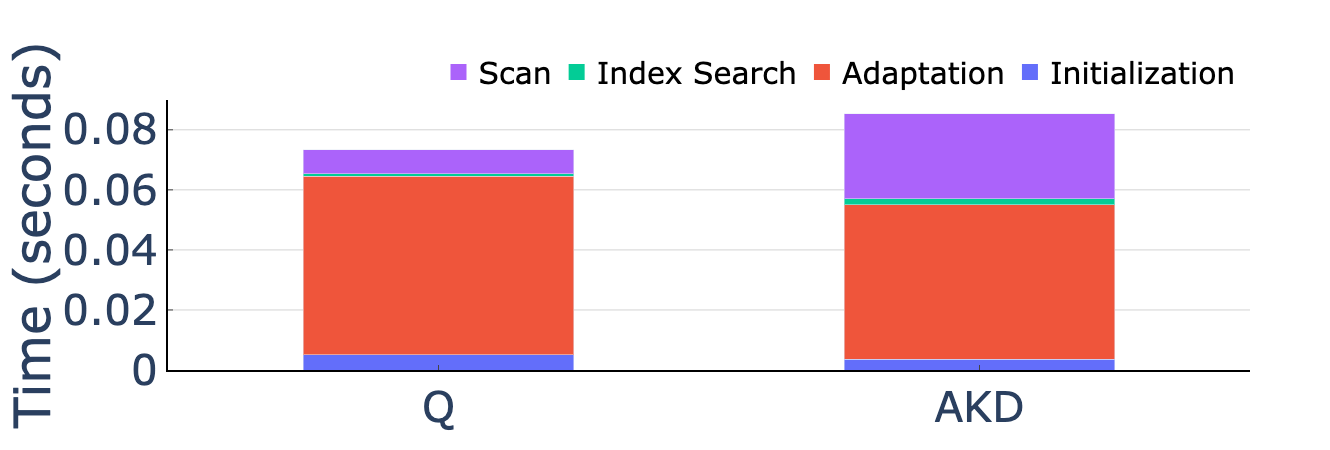

In [13]:
break_down('Periodic2', ['Quasii', 'CrackingKDTree'], -1)

# Comparison with different number of columns

In [14]:
exps = []

for i in [2, 4, 8, 16]:
    exps.append(f'Uniform{i}')

a = metrics(exps, [
        'MedianKDTree',
        'AverageKDTree',
        'Quasii',
        'CrackingKDTree',
        'ProgressiveIndex',
        'ProgressiveIndexCostModel',
        'FullScan',
])
latex = pandas_to_latex(a, 'min', ignore_last=True)
for exp in exps:
    latex = latex.replace(experiments[exp]['name'], "\\rotatebox[origin=c]{90}{%s}" % experiments[exp]['name'])
print(latex)
a

KeyError: 'Uniform4'

# First Query

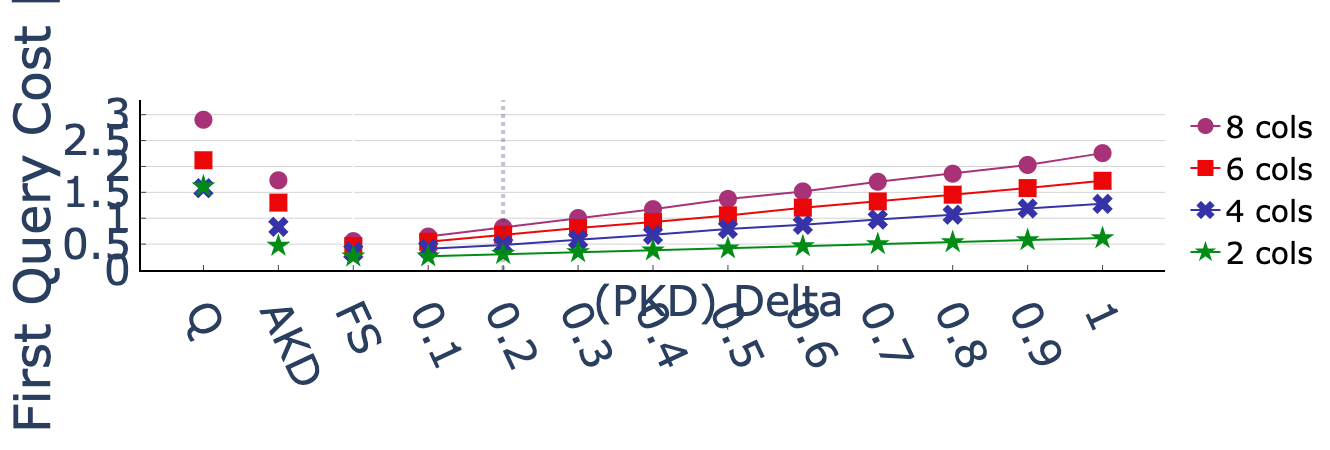

In [913]:
fig = create_figure()

cols = [8, 6, 4, 2]
markers = delta_markers
colors = ['rgba(168, 50, 119, 1)', 'rgba(235, 7, 7, 1)', 'rgba(54, 50, 168, 1)', 'rgba(1, 140, 22, 1)']
markers = delta_markers

lines = []
shapes = []

for i, marker, color in zip(cols, markers, colors):

    fq_times = []
    for d in deltas:
        fq_times.append(get_first_query(read(f'ProgressiveIndex_{d}', f'Uniform{i}')))
    lines.append(
        go.Scatter(
            name=f'{i} cols',
            x=deltas,
            y=fq_times,
            mode='lines+markers',
            marker=dict(
                size=18,
                symbol=marker
            ),
            marker_color=color
        )
    )
    
    # add other indices values
    
    lines.append(
        go.Scatter(
            name=f'{i}FullScan',
            x=[-0.0],
            y=[get_first_query(read(f'FullScan', f'Uniform{i}'))],
            mode='markers',
            marker_color=color,
            marker=dict(
                size=18,
                symbol=marker
            ),
            showlegend=False
        )
    )
    
    lines.append(
        go.Scatter(
            name=f'{i}AKD',
            x=[-0.1],
            y=[get_first_query(read(f'CrackingKDTree' ,f'Uniform{i}'))],
            mode='markers',
            marker_color=color,
            marker=dict(
                size=18,
                symbol=marker
            ),
            showlegend=False
        )
    )
    
    lines.append(
        go.Scatter(
            name=f'{i}Quasii',
            x=[-0.2],
            y=[get_first_query(read(f'Quasii' ,f'Uniform{i}'))],
            mode='markers',
            marker_color=color,
            marker=dict(
                size=18,
                symbol=marker
            ),
            showlegend=False
        )
    )
    
#     lines.append(
#         go.Scatter(
#             name=f'{i}AvgKD',
#             x=[-0.3],
#             y=[get_first_query(read(f'AverageKDTree' ,f'Uniform{i}'))],
#             mode='markers',
#             marker_color=color,
#             marker=dict(
#                 size=18,
#                 symbol='circle'
#             ),
#             showlegend=False
#         )
#     )
    
#     lines.append(
#         go.Scatter(
#             name=f'{i}MedKD',
#             x=[-0.4],
#             y=[get_first_query(read(f'MedianKDTree' ,f'Uniform{i}'))],
#             mode='markers',
#             marker_color=color,
#             marker=dict(
#                 size=18,
#                 symbol='circle'
#             ),
#             showlegend=False
#         )
#     )

# add line at 0.2 delta
shapes.append(
    dict(
        type= 'line',
        yref="paper", y0= 0, y1=1,
        x0= 0.2, x1=0.2,
        opacity=0.3,
        line=dict(
            width=4,
            dash="dot",
        )
    )
)

fig.add_traces(data=lines)
fig.update_layout(showlegend=True, yaxis_title='First Query Cost [s]', shapes=shapes)
fig.update_xaxes(tickangle=65)
fig.update_layout(
#     xaxis=dict(
#         tickmode = 'linear',
#         tick0 = 0.0,
#         dtick = 0.1
#     )
    xaxis = dict(
        tickmode = 'array',
        tickvals = [-0.2, -0.1, -0.0] + deltas,
        ticktext = ['Q', 'AKD', 'FS'] + deltas
    ),
    yaxis= dict(
        tickmode ='linear',
        dtick=0.5
#         tickvals = [0, 0.5, 1, 1.5, 2, 2.5, 3],
#         ticktext = [0, 0.5, 1, 1.5, 2, 2.5, 3]
    ),
    annotations=[
        dict(
            x=0.5,
            y=-0.35,
            text="(PKD) Delta",
            xref="x",
            yref="paper",
        )
    ],
    autosize=True,
    margin=dict(
        b=180
    ),
)
fig.update_yaxes(rangemode="tozero")
save_figure(fig, 'delta_exp_first_query.pdf')
fig

# Payoff

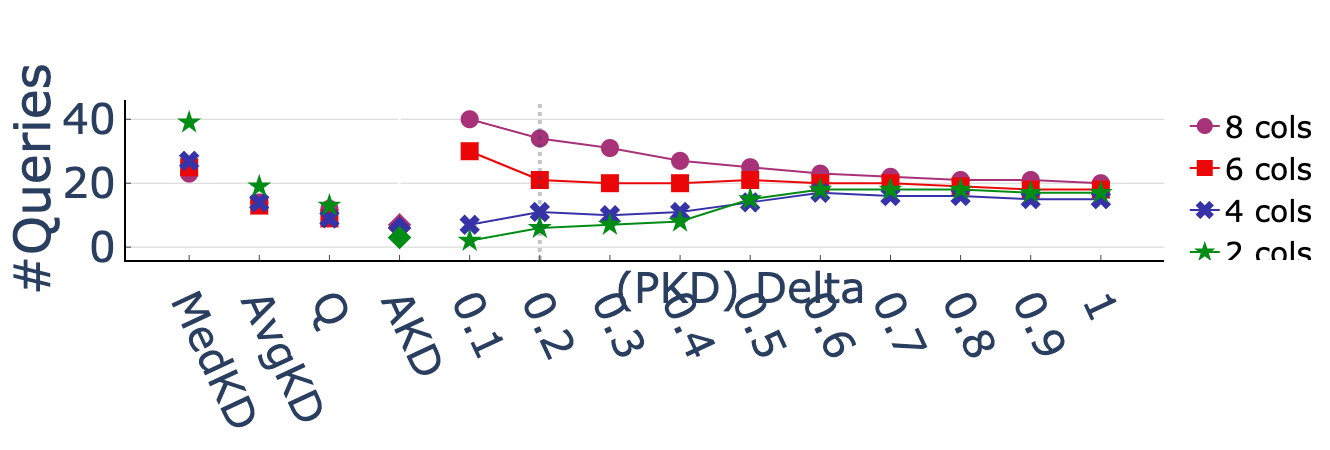

In [912]:
fig = create_figure()

cols = [8, 6, 4, 2]
markers = delta_markers
colors = ['rgba(168, 50, 119, 1)', 'rgba(235, 7, 7, 1)', 'rgba(54, 50, 168, 1)', 'rgba(1, 140, 22, 1)']

lines = []

for i, marker, color in zip(cols, markers, colors):
    fq_times = []
    for d in deltas:
        fq_times.append(get_payoff(read(f'ProgressiveIndex_{d}', f'Uniform{i}'), read('FullScan', f'Uniform{i}')))
    lines.append(
        go.Scatter(
            name=f'{i} cols',
            x=deltas,
            y=fq_times,
            mode='lines+markers',
            marker=dict(
                size=18,
                symbol=marker
            ),
            marker_color=color
        )
    )
    
    # add other indices values
    lines.append(
        go.Scatter(
            name=f'{i}AKD',
            x=[-0.0],
            y=[get_payoff(read(f'CrackingKDTree' ,f'Uniform{i}'), read('FullScan', f'Uniform{i}'))],
            mode='markers',
            marker_color=color,
            marker=dict(
                size=18,
                symbol='diamond'
            ),
            showlegend=False
        )
    )
    
    lines.append(
        go.Scatter(
            name=f'{i}Quasii',
            x=[-0.1],
            y=[get_payoff(read(f'Quasii' ,f'Uniform{i}'), read('FullScan', f'Uniform{i}'))],
            mode='markers',
            marker_color=color,
            marker=dict(
                size=18,
                symbol=marker
            ),
            showlegend=False
        )
    )
    
    lines.append(
        go.Scatter(
            name=f'{i}AvgKD',
            x=[-0.2],
            y=[get_payoff(read(f'AverageKDTree' ,f'Uniform{i}'), read('FullScan', f'Uniform{i}'))],
            mode='markers',
            marker_color=color,
            marker=dict(
                size=18,
                symbol=marker
            ),
            showlegend=False
        )
    )
    
    lines.append(
        go.Scatter(
            name=f'{i}MedKD',
            x=[-0.3],
            y=[get_payoff(read(f'MedianKDTree' ,f'Uniform{i}'), read('FullScan', f'Uniform{i}'))],
            mode='markers',
            marker_color=color,
            marker=dict(
                size=18,
                symbol=marker
            ),
            showlegend=False
        )
    )

# adding the 6 columns with 50% per attribute
# fq_times = []
# for d in deltas:
#     fq_times.append(get_payoff(read(f'ProgressiveIndex_{d}', f'Uniform6_50'), read('FullScan', f'Uniform6_50')))
# lines.append(
#     go.Scatter(
#         name=f'6 cols (50%)',
#         x=deltas,
#         y=fq_times,
#         mode='lines+markers'
#     )
# )

fig.add_traces(data=lines)
fig.update_layout(showlegend=True, yaxis_title='#Queries')
fig.update_xaxes(tickangle=65)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [-0.3, -0.2, -0.1, -0.0] + deltas,
        ticktext = ['MedKD', 'AvgKD', 'Q', 'AKD'] + deltas
    ),
    shapes=[
        dict(
            type= 'line',
            yref="paper", y0= 0, y1=1,
            x0= 0.2, x1=0.2,
            opacity=0.3,
            line=dict(
                width=4,
                dash="dot",
            )
        )
    ],
    annotations=[
        dict(
            x=0.5,
            y=-0.35,
            text="(PKD) Delta",
            xref="x",
            yref="paper",
        )
    ],
    autosize=True,
    margin=dict(
        b=190
    ),
)
save_figure(fig, 'delta_exp_pay_off.pdf')
fig

# Convergence

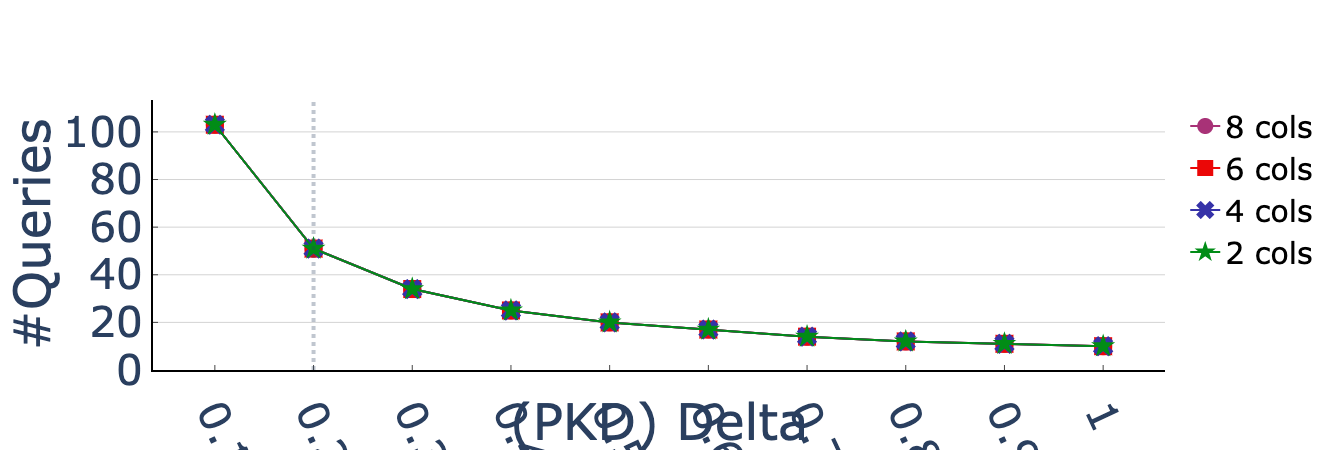

In [909]:
fig = create_figure()

cols = [8, 6, 4, 2]
markers = delta_markers
colors = ['rgba(168, 50, 119, 1)', 'rgba(235, 7, 7, 1)', 'rgba(54, 50, 168, 1)', 'rgba(1, 140, 22, 1)']

lines = []

for i, marker, color in zip(cols, markers, colors):
    fq_times = []
    for d in deltas:
        fq_times.append(get_convergence(read(f'ProgressiveIndex_{d}', f'Uniform{i}')))
    lines.append(
        go.Scatter(
            name=f'{i} cols',
            x=deltas,
            y=fq_times,
            mode='lines+markers',
            marker=dict(
                size=18,
                symbol=marker
            ),
            marker_color=color
        )
    )

fig.add_traces(data=lines)
fig.update_layout(showlegend=True, yaxis_title='#Queries', xaxis_title='<br>(PKD) Delta')
fig.update_xaxes(tickangle=65)
fig.update_layout(
    xaxis=dict(
        tickmode = 'linear',
        tick0 = 0.0,
        dtick = 0.1
    ),
    shapes=[
        dict(
            type= 'line',
            yref="paper", y0= 0, y1=1,
            x0= 0.2, x1=0.2,
            opacity=0.3,
            line=dict(
                width=4,
                dash="dot",
            )
        )
    ]
)
fig.update_yaxes(rangemode="tozero")
save_figure(fig, 'delta_exp_convergence.pdf')
fig

# Cumulative cost after convergence vs total cumulative cost

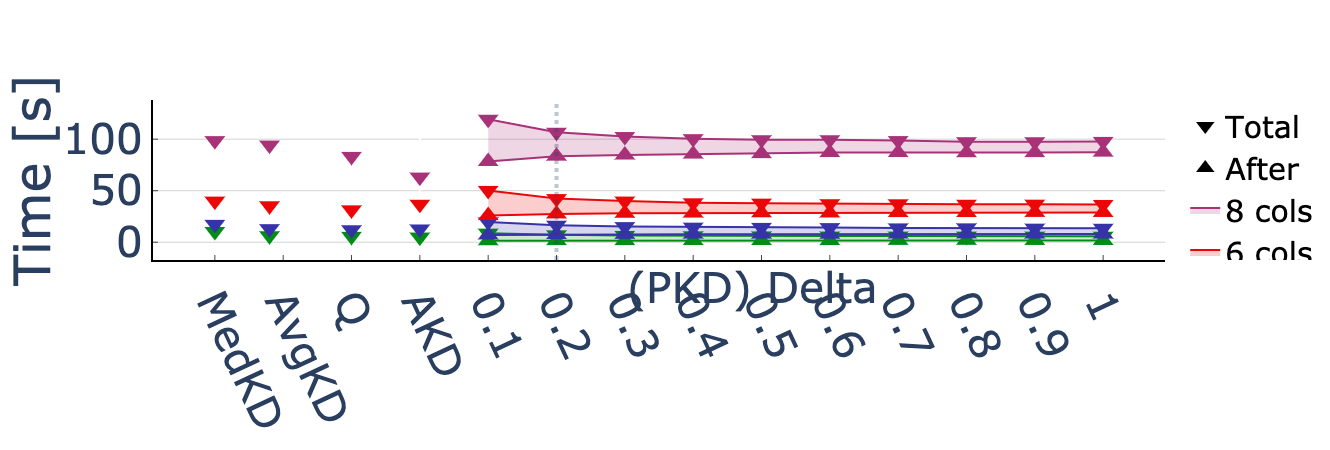

In [911]:
algs = [f'ProgressiveIndex_{d}' for d in deltas]
exp = 'Uniform8'
fig = create_figure()

cols = [2, 4, 6, 8]
markers = delta_markers
colors = ['rgba(168, 50, 119, 1)', 'rgba(235, 7, 7, 1)', 'rgba(54, 50, 168, 1)', 'rgba(1, 140, 22, 1)']
colors.reverse()
fill_colors = ['rgba(168, 50, 119, 0.2)', 'rgba(235, 7, 7, 0.2)', 'rgba(54, 50, 168, 0.2)', 'rgba(1, 140, 22, 0.2)']
fill_colors.reverse()
lines = []

for i, marker, color, fill_color in zip(cols, markers, colors, fill_colors):
    fq_times = []
    # Plot afters
    for d in deltas:
        fq_times.append(
            get_total_time(
                read(f'ProgressiveIndex_{d}', f'Uniform{i}'),
                lower=get_convergence(read(f'ProgressiveIndex_{d}', f'Uniform{i}'))
            )
        )
    lines.append(
        go.Scatter(
            name=f'{i} cols',
            x=deltas,
            y=fq_times,
            mode='lines',
            marker_color=color,
            showlegend=False
        )
    )

    
    # Plot totals
    fq_times = []
    for d in deltas:
        fq_times.append(
            get_total_time(
                read(f'ProgressiveIndex_{d}', f'Uniform{i}')
            )
        )
    lines.append(
        go.Scatter(
            name=f'{i} cols',
            x=deltas,
            y=fq_times,
            mode='lines',
            marker_color=color,
            fill='tonexty',
            fillcolor=fill_color
        )
    )
    
    fq_times = []
    # Plot afters triangles
    for d in deltas:
        fq_times.append(
            get_total_time(
                read(f'ProgressiveIndex_{d}', f'Uniform{i}'),
                lower=get_convergence(read(f'ProgressiveIndex_{d}', f'Uniform{i}'))
            )
        )
    lines.append(
        go.Scatter(
            name=f'{i} cols',
            x=deltas,
            y=fq_times,
            mode='markers',
            marker_color=color,
            marker=dict(
                size=18,
                symbol='triangle-up'
            ),
            showlegend=False
        )
    )

    
    # Plot totals triangles
    fq_times = []
    for d in deltas:
        fq_times.append(
            get_total_time(
                read(f'ProgressiveIndex_{d}', f'Uniform{i}')
            )
        )
    lines.append(
        go.Scatter(
            name=f'{i} cols',
            x=deltas,
            y=fq_times,
            mode='markers',
            marker_color=color,
            marker=dict(
                size=18,
                symbol='triangle-down'
            ),
            showlegend=False
        )
    )
    
    # add other indices values
    lines.append(
        go.Scatter(
            name=f'{i}AKD',
            x=[-0.0],
            y=[get_total_time(read(f'CrackingKDTree' ,f'Uniform{i}'))],
            mode='markers',
            marker_color=color,
            marker=dict(
                size=18,
                symbol='triangle-down'
            ),
            showlegend=False
        )
    )
    
    lines.append(
        go.Scatter(
            name=f'{i}Quasii',
            x=[-0.1],
            y=[get_total_time(read(f'Quasii' ,f'Uniform{i}'))],
            mode='markers',
            marker_color=color,
            marker=dict(
                size=18,
                symbol='triangle-down'
            ),
            showlegend=False
        )
    )
    
    lines.append(
        go.Scatter(
            name=f'{i}AvgKD',
            x=[-0.22],
            y=[get_total_time(read(f'AverageKDTree' ,f'Uniform{i}'))],
            mode='markers',
            marker_color=color,
            marker=dict(
                size=18,
                symbol='triangle-down'
            ),
            showlegend=False
        )
    )
    
    lines.append(
        go.Scatter(
            name=f'{i}MedKD',
            x=[-0.3],
            y=[get_total_time(read(f'MedianKDTree' ,f'Uniform{i}'))],
            mode='markers',
            marker_color=color,
            marker=dict(
                size=18,
                symbol='triangle-down'
            ),
            showlegend=False
        )
    )


# Add triangles in the legend
lines.append(
        go.Scatter(
            name=f'After',
            x=[None],
            y=[None],
            mode='markers',
            marker_color='black',
            marker=dict(
                size=18,
                symbol='triangle-up'
            ),
        )
    )

lines.append(
        go.Scatter(
            name=f'Total',
            x=[None],
            y=[None],
            mode='markers',
            marker_color='black',
            marker=dict(
                size=18,
                symbol='triangle-down'
            ),
        )
    )



fig.add_traces(data=lines)
fig.update_layout(showlegend=True, yaxis_title='Time [s]',)
fig.update_xaxes(tickangle=65)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [-0.3, -0.2, -0.1, -0.0] + deltas,
        ticktext = ['MedKD', 'AvgKD', 'Q', 'AKD'] + deltas
    ),
    shapes=[
        dict(
            type= 'line',
            yref="paper", y0= 0, y1=1,
            x0= 0.2, x1=0.2,
            opacity=0.3,
            line=dict(
                width=4,
                dash="dot",
            )
        )
    ],
    annotations=[
        dict(
            x=0.5,
            y=-0.35,
            text="(PKD) Delta",
            xref="x",
            yref="paper",
        )
    ],
    autosize=True,
    margin=dict(
        b=150
    ),
)
save_figure(fig, 'delta_exp_total_time.pdf')
fig

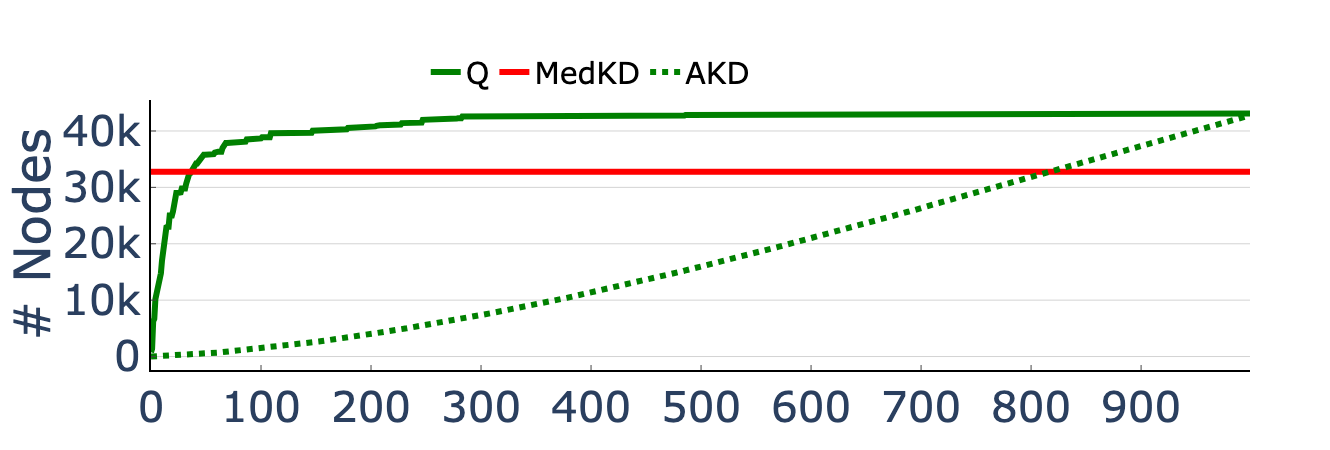

In [953]:
number_of_nodes('Uniform2', ['Quasii', 'MedianKDTree', 'CrackingKDTree'])

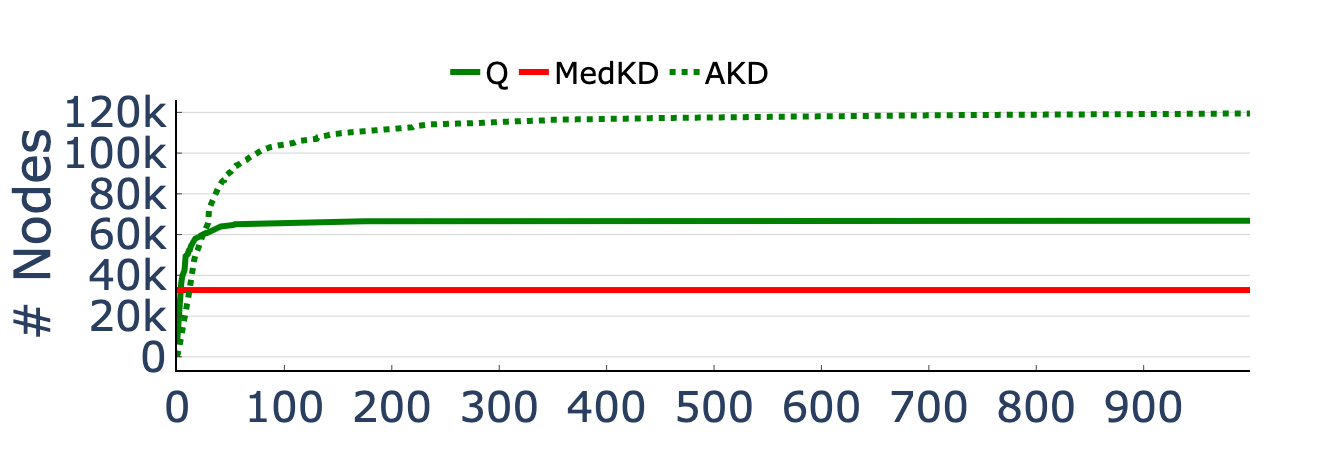

In [954]:
number_of_nodes('Uniform8', ['Quasii', 'MedianKDTree', 'CrackingKDTree'])

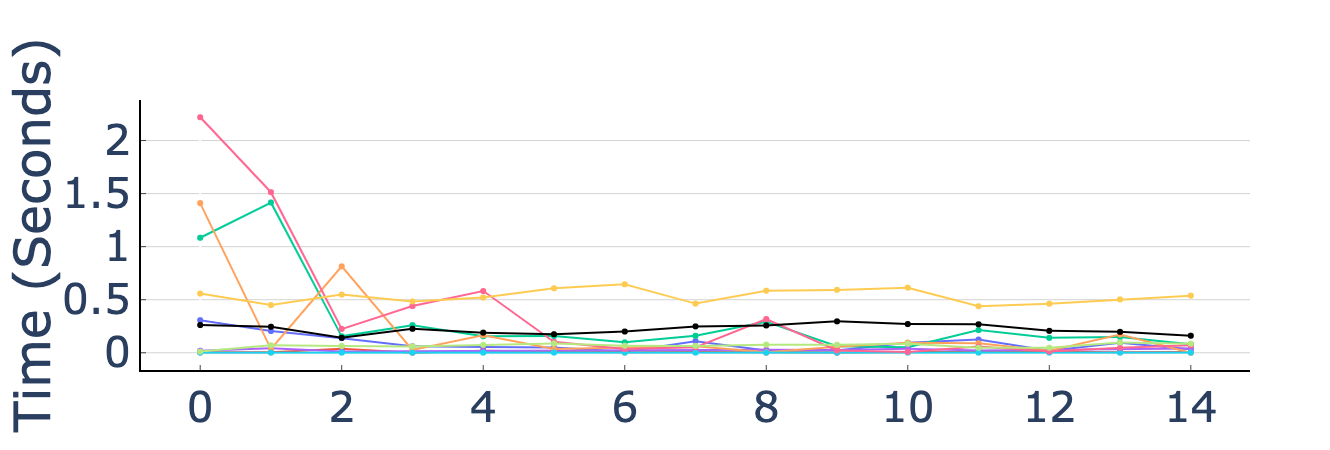

In [988]:
fig = create_figure()
limit= 15
lines = []


times = np.array(read('CrackingKDTree', 'Uniform2')['adaptation_time'][:limit])
lines.append(
    go.Scatter(
        name='akd2- adaptation',
        x=list(range(len(times))),
        y=times,
        mode='lines+markers'
    )
)

times = np.array(read('CrackingKDTree', 'Uniform2')['index_search_time'][:limit]) + np.array(read('CrackingKDTree', 'Uniform2')['scan_time'][:limit])
lines.append(
    go.Scatter(
        name='akd2- scan',
        x=list(range(len(times))),
        y=times,
        mode='lines+markers'
    )
)

times = np.array(read('CrackingKDTree', 'Uniform8')['adaptation_time'][:limit])
lines.append(
    go.Scatter(
        name='akd8- adaptation',
        x=list(range(len(times))),
        y=times,
        mode='lines+markers'
    )
)

times = np.array(read('CrackingKDTree', 'Uniform8')['index_search_time'][:limit]) + np.array(read('CrackingKDTree', 'Uniform8')['scan_time'][:limit])
lines.append(
    go.Scatter(
        name='akd8- scan',
        x=list(range(len(times))),
        y=times,
        mode='lines+markers'
    )
)


times = np.array(read('Quasii', 'Uniform2')['adaptation_time'][:limit])
lines.append(
    go.Scatter(
        name='q2- adaptation',
        x=list(range(len(times))),
        y=times,
        mode='lines+markers'
    )
)

times = np.array(read('Quasii', 'Uniform2')['index_search_time'][:limit]) + np.array(read('Quasii', 'Uniform2')['scan_time'][:limit])
lines.append(
    go.Scatter(
        name='q2- scan',
        x=list(range(len(times))),
        y=times,
        mode='lines+markers'
    )
)

times = np.array(read('Quasii', 'Uniform8')['adaptation_time'][:limit])
lines.append(
    go.Scatter(
        name='q8- adaptation',
        x=list(range(len(times))),
        y=times,
        mode='lines+markers'
    )
)

times = np.array(read('Quasii', 'Uniform8')['index_search_time'][:limit]) + np.array(read('Quasii', 'Uniform8')['scan_time'][:limit])
lines.append(
    go.Scatter(
        name='q8- scan',
        x=list(range(len(times))),
        y=times,
        mode='lines+markers'
    )
)

times = np.array(read('FullScan', 'Uniform2')['index_search_time'][:limit]) + np.array(read('FullScan', 'Uniform2')['scan_time'][:limit])
lines.append(
    go.Scatter(
        name='fs 2cols - scan',
        x=list(range(len(times))),
        y=times,
        mode='lines+markers',
        marker_color='black'
    )
)

times = np.array(read('FullScan', 'Uniform8')['index_search_time'][:limit]) + np.array(read('FullScan', 'Uniform8')['scan_time'][:limit])
lines.append(
    go.Scatter(
        name='fs 8cols - scan',
        x=list(range(len(times))),
        y=times,
        mode='lines+markers',
    )
)

fig.add_traces(data=lines)
fig.update_layout(legend_orientation="h", legend=dict(x=.25, y=1.2))
fig.update_layout(showlegend=False, yaxis_title='Time (Seconds)')
fig

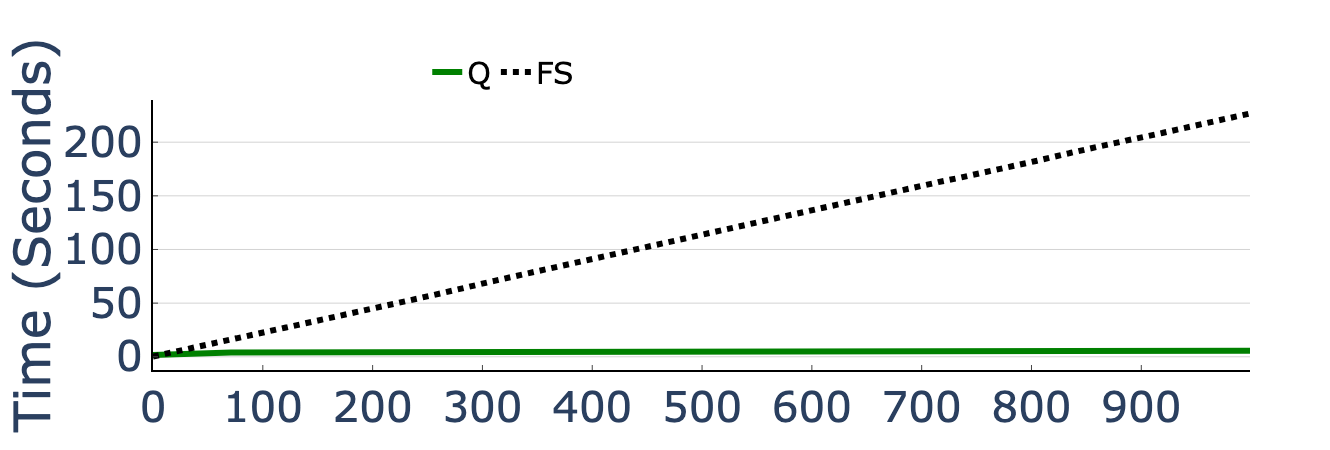

In [985]:
cummulative('Uniform2', ['Quasii', 'FullScan'])

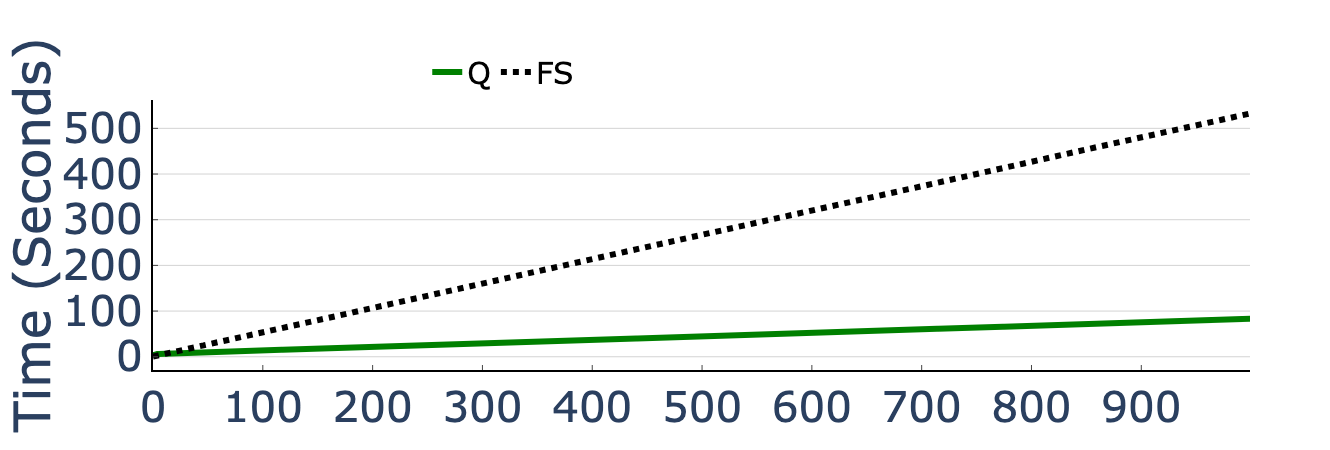

In [986]:
cummulative('Uniform8', ['Quasii', 'FullScan'])